# 11장 실용적인 딥러닝을 위해

In [7]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
# PDF 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### 11.1 프레임워크의 활용

In [9]:
# 데이터 준비

# 변수 정의

# D: 입력 노드 개수
D = 784

# H: 은닉층의 노드 개수
H = 128

# 분류 클래스의 개수
num_classes = 10

# Keras 함수로 데이터 읽기
from keras.datasets import mnist
(x_train_org, y_train), (x_test_org, y_test) \
 = mnist.load_data()

# 입력 데이터의 가공(1차원)
x_train = x_train_org.reshape(-1, D) / 255.0
x_test = x_test_org.reshape((-1, D)) / 255.0

# 정답 데이터의 가공(원핫 인코딩)
from keras.utils import np_utils
y_train_ohe =\
 np_utils.to_categorical(y_train, num_classes)
y_test_ohe =\
 np_utils.to_categorical(y_test, num_classes)

In [10]:
# 모델의 정의

# 필요 라이브러리 로딩
from keras.models import Sequential
from keras.layers import Dense

# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu'))

# 출력층
model.add(Dense(num_classes, activation='softmax'))

# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

In [6]:
# 학습 과정

# 학습의 단위
batch_size = 512

# 반복 횟수
nb_epoch = 50

# 모델의 학습
history1 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 0s 3ms/step - loss: 2.0644 - accuracy: 0.4047 - val_loss: 1.7384 - val_accuracy: 0.6484
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 1.4275 - accuracy: 0.7081 - val_loss: 1.0995 - val_accuracy: 0.7819
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9388 - accuracy: 0.8010 - val_loss: 0.7642 - val_accuracy: 0.8402
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.8377 - val_loss: 0.6066 - val_accuracy: 0.8613
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.8577 - val_loss: 0.5197 - val_accuracy: 0.8749
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.8703 - val_loss: 0.4664 - val_accuracy: 0.8827
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.8777 - val_loss: 0.4296 - val_accuracy: 0.8879
Epoch 

## 11.4 수치미분

In [11]:
import numpy as np

# 네이피어 상수를 밑으로 하는 로그함수의 정의
def f(x):
    return np.exp(x)

# 아주 작은 수 h의 정의
h = 0.001

# f'(0)의 근사계산
# f'(0) = f(0) = 1에 가까워짐
diff = (f(0 + h) - f(0 - h))/(2 * h)

# 결과 확인
print(diff)

1.0000001666666813


## 11.5 고도의 학습법

### SGD

In [12]:
# 필요 라이브러리 로딩
from keras.models import Sequential
from keras.layers import Dense

# 학습의 단위
batch_size = 512

# 반복 횟수
nb_epoch = 50

In [13]:
# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 출력층
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [14]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

# 모델의 학습
history1 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 0s 3ms/step - loss: 1.8810 - accuracy: 0.4668 - val_loss: 1.3835 - val_accuracy: 0.7014
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.7513 - val_loss: 0.8257 - val_accuracy: 0.8072
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.8243 - val_loss: 0.6122 - val_accuracy: 0.8482
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.8536 - val_loss: 0.5089 - val_accuracy: 0.8715
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.8700 - val_loss: 0.4518 - val_accuracy: 0.8809
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8814 - val_loss: 0.4119 - val_accuracy: 0.8931
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8884 - val_loss: 0.3860 - val_accuracy: 0.8969
Epoch 

### RmsProp

In [15]:
# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 출력층
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [16]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

# 모델의 학습
history2 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.8722 - val_loss: 0.2366 - val_accuracy: 0.9316
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9420 - val_loss: 0.2400 - val_accuracy: 0.9242
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9591 - val_loss: 0.1488 - val_accuracy: 0.9550
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.9674 - val_loss: 0.1159 - val_accuracy: 0.9659
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9744 - val_loss: 0.1179 - val_accuracy: 0.9621
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.1121 - val_accuracy: 0.9663
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0864 - val_accuracy: 0.9717
Epoch 

### Momentum

In [17]:
# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 출력층
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [18]:
# 모델의 컴파일
from keras import optimizers
sgd = optimizers.SGD(momentum = 0.9)
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics=['accuracy'])

# 모델의 학습
history3 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.7663 - val_loss: 0.3481 - val_accuracy: 0.8999
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.9074 - val_loss: 0.2781 - val_accuracy: 0.9213
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9226 - val_loss: 0.2411 - val_accuracy: 0.9321
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9315 - val_loss: 0.2207 - val_accuracy: 0.9359
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9389 - val_loss: 0.2037 - val_accuracy: 0.9403
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9431 - val_loss: 0.1872 - val_accuracy: 0.9459
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9481 - val_loss: 0.1732 - val_accuracy: 0.9495
Epoch 

### 그래프 표시 및 비교

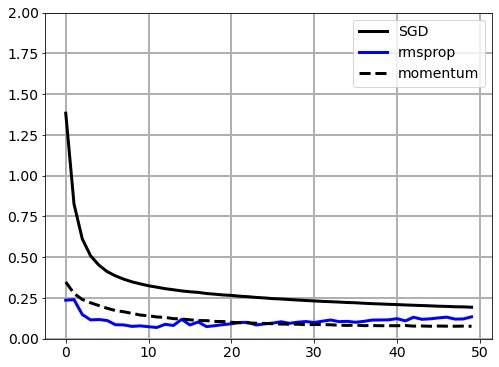

In [19]:
#import matplotlib.pyplot as plt

# 학습 곡선 표시(손실함수의 값)
plt.figure(figsize=(8,6))
plt.plot(history1.history['val_loss'],label='SGD', lw=3, c='k')
plt.plot(history2.history['val_loss'],label='rmsprop', lw=3, c='b')
plt.plot(history3.history['val_loss'],label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0,2)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

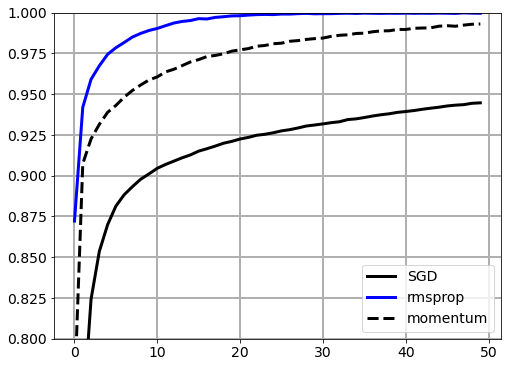

In [20]:
import matplotlib.pyplot as plt

# 학습 곡선 표시(정확도)
plt.figure(figsize=(8,6))
plt.plot(history1.history['accuracy'],label='SGD', lw=3, c='k')
plt.plot(history2.history['accuracy'],label='rmsprop', lw=3, c='b')
plt.plot(history3.history['accuracy'],label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0.8,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

## 11.6 과학습 대책

In [21]:
# 정답 데이터의 데이터 수
div = 8

# 근사다항식의 차원
dim = 8

# y = -x*4 + x**3 -3x**2 + 8x -7
p = [-1, 1, -3, 8, -7]

# x의 정의역[-2, 1]
xMin = -2
xMax = 1

$ f(x) = -x^4 + x^3 -3x^2 + 8x -7 + N(0,5) $

In [22]:
# x: xMin과 xMan의 사이를 div개로 분할한 벡터
x = np.linspace(xMin, xMax, num=div)

# xx: x를 10배 더 세밀한 간격으로 분할한 벡터
xx = np.linspace(xMin, xMax, num=div*10)

# y, yy: x, xx 각각의 벡터에 대해 다항식의 값을 계산한 벡터
y = np.polyval(p, x)
yy = np.polyval(p, xx)

# z: y에 정규분포의 노이즈를 추가하고 이것을 정답 데이터고 한다.
z = y + 5 * np.random.randn(div)

In [23]:
# 벡터 표시용 함수
def print_fix(x):
    [print('{:.3f}'.format(n)) for n in x]
    
# 모델을 인용하여 다항식의 계산을 표시
def print_fix_model(m):
    w = m.coef_.tolist()
    w[0] = m.intercept_
    print_fix(w)    

In [24]:
# 다항식 행렬을 만들어 모델의 입력 변수로 한다.

# x**n의 벡터 계산용 함수
def f(x) :
    return [x**i for i in range(dim)]

# x: x벡터에서 다항식 2차원 배열을 만든 것
X = [f(x0) for x0 in x]

# Xx: xx벡터에서 다항식 2차원 배열을 만든 것
XX = [f(x0) for x0 in xx]

In [25]:
# 선형 모델 라이브러리의 로딩
from sklearn.linear_model import LinearRegression

# 모델의 초기화 및 학습
model = LinearRegression().fit(X, z)

# 예측값의 취득
yy_pred = model.predict(XX)

In [26]:
# Ridge 모델 라이브러리의 로딩
from sklearn.linear_model import Ridge

# 모델의 생성 및 학습
#model2 = Ridge(alpha=5).fit(X, z)
model2 = Ridge(alpha=0.5).fit(X, z)

In [27]:
# 예측값의 취득
yy_pred2 = model2.predict(XX)

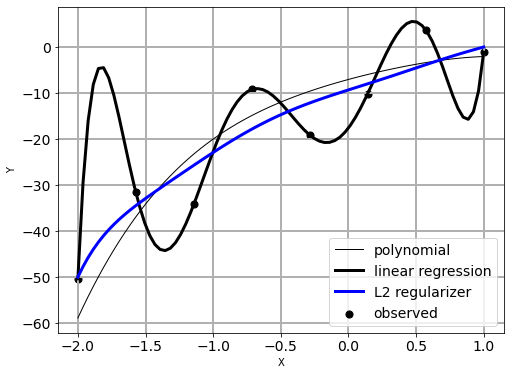

In [28]:
# 그래프 표시
plt.figure(figsize=(8,6))
plt.plot(xx, yy, label='polynomial', lw=1, c='k')
plt.scatter(x, z, label='observed', s=50, c='k')
plt.plot(xx, yy_pred, label='linear regression', lw=3, c='k')
plt.plot(xx, yy_pred2, label='L2 regularizer', lw=3, c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()